In [2]:
import numpy as np
from scipy.special import legendre
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import modepy
from functools import partial

In [3]:
quad = modepy.quadrature.jacobi_gauss.LegendreGaussQuadrature(10)
print(quad.nodes)
print(quad.weights)
print(quad.exact_to)

[-9.78228658e-01 -8.87062600e-01 -7.30152006e-01 -5.19096129e-01
 -2.69543156e-01  1.05947361e-16  2.69543156e-01  5.19096129e-01
  7.30152006e-01  8.87062600e-01  9.78228658e-01]
[0.05566857 0.12558037 0.18629021 0.23319376 0.26280454 0.27292509
 0.26280454 0.23319376 0.18629021 0.12558037 0.05566857]
21


In [4]:
def f(x):
    # return np.cos(np.pi*x)
    return np.abs(x)

# set k
k = 10

M = np.zeros((k+1, k+1))
quad = modepy.quadrature.jacobi_gauss.LegendreGaussQuadrature(k)
qx = quad.nodes
qw = quad.weights
F = np.zeros(k+1)

x = modepy.quadrature.jacobi_gauss.legendre_gauss_lobatto_nodes(k)
def _phia(i, x):
    w = np.zeros_like(x)
    w[i] = 1
    return lagrange(x, w)
phia = partial(_phia, x=x)

def phib(i):
    return legendre(i) / np.sqrt(2/(2*i+1))
    
phi = phia
for i in range(k+1):
    for j in range(k+1):
        M[i, j] = np.sum(qw * phi(i)(qx) * phi(j)(qx))   # \int_{-1}^{1} phi_i phi_j
    F[i] = np.sum(qw * f(qx) * phi(i)(qx))

In [5]:
a = np.linalg.solve(M, F)

In [6]:
xx = np.linspace(-1, 1, 100)
pk = np.zeros_like(xx)
for i in range(k+1):
    pk += a[i] * phi(i)(xx)

(-1.1, 1.1, -0.05251326540303357, 1.102778573463707)

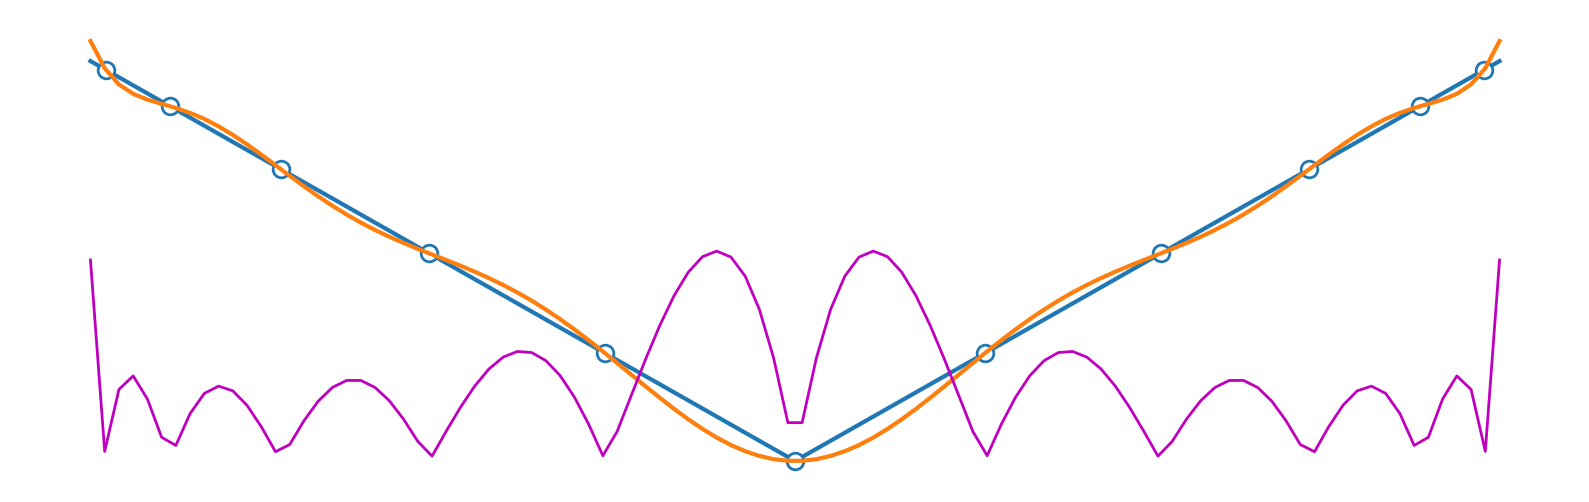

In [12]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(xx, f(xx))
ax.plot(qx, f(qx), 'o', color='tab:blue', markerfacecolor='w')
ax.plot(xx, pk)
ax.plot(xx, 10*np.abs(pk-f(xx)), 'm-', lw=1)
ax.axis('off')